# SCC0570 - Introdução a Redes Neurais
## Instituto de Ciências Matemáticas e Computação - Unversidade de São Paulo

* Alef Segura Santos, 9762942
* Gustavo de Moura Souza, 9762981

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import util
from MLP import MLP
from RBFNet import RBFNet

### Leitura e Preparação dos Dados

In [2]:
# Leitura do csv
df = pd.read_csv('datasets/semeion.data', sep=' ', lineterminator='\n')
print(df.shape)

# Preparação do dataset
digitos = util.prepara_dataset(df, 10)

(1592, 266)


### Cálculo dos centróides

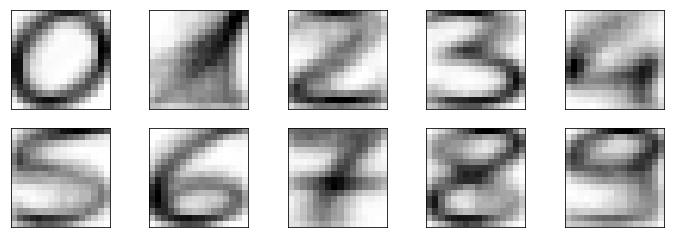

In [3]:
centroides = []
for i in range(1,11):
    centroides.append(digitos.X[np.argmax(digitos.Y,axis=1)+1 == i].mean(axis=0))

i = 1
plt.figure(figsize=(12,4))
for c in centroides:
    plt.subplot(2,5,i)
    plt.imshow(c.reshape(16,16), cmap='binary')
    plt.xticks([])
    plt.yticks([])
    i += 1
plt.show()

# Treinamento dos Modelos
### MLP

In [ ]:
mlp = MLP(hidden_units=[20],  learning_rate=0.5)
mlp.fit(digitos, n_classes=10, train_size=0.7, delta_error=0.01)
print('Acurácia:', mlp.score())

Last epoch: 87 | Error: 6.773775285262842
Acurácia: 0.893305439330544


### RBF

In [ ]:
rbf = RBFNet(eta=0.5, sigma=1.2)
rbf.fit(digitos, n_classes=10, clusters=centroides, train_size=0.7, delta_error=0.01)
print('Acurácia:', rbf.score())

# Comparação

In [ ]:
# Separa amostras de cada dígito
sample = util.sample(digitos)

# Resultado
plt.figure(figsize=(13,5))

for s in sample:
    # Amostra aleatória
    rand = np.random.randint(0, len(sample[s]))
    pred_mlp = mlp.predict(sample[s][rand])
    pred_rbf = rbf.predict(sample[s][rand])
    
    # Mostrando resultado
    plt.subplot(2,5,int(s)+1)
    plt.imshow(sample[s][rand].reshape(16,16), cmap='binary')
    plt.title('Real: {}\nMLP: {} | RBF: {}'.format(s, pred_mlp, pred_rbf))
    plt.xticks([])
    plt.yticks([])
    
plt.show()